In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import json  #json형태의 컬럼값 펼치기
from pandas import json_normalize

In [2]:
df = pd.read_csv("/Users/sookyeong/Desktop/train 2.csv")

/var/folders/tz/h0d7hy211kj12my58s3b3m7m0000gn/T/ipykernel_1444/1693422276.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/sookyeong/Desktop/train 2.csv")


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   channelGrouping       903653 non-null  object
 1   date                  903653 non-null  int64 
 2   device                903653 non-null  object
 3   fullVisitorId         903653 non-null  object
 4   geoNetwork            903653 non-null  object
 5   sessionId             903653 non-null  object
 6   socialEngagementType  903653 non-null  object
 7   totals                903653 non-null  object
 8   trafficSource         903653 non-null  object
 9   visitId               903653 non-null  int64 
 10  visitNumber           903653 non-null  int64 
 11  visitStartTime        903653 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 82.7+ MB


In [4]:
device_df = json_normalize(df['device'].apply(json.loads))


In [5]:
geonetwork_df = json_normalize(df['geoNetwork'].apply(json.loads))

In [6]:
totals_df = json_normalize(df['totals'].apply(json.loads))

In [7]:
trafficsource_df = json_normalize(df['trafficSource'].apply(json.loads))

In [8]:
# POSIX 시간을 datetime으로 변환하여 새로운 컬럼에 저장
df['new_visitStartTime'] = pd.to_datetime(df['visitStartTime'], unit='s')  # unit='s'는 초 단위를 의미합니다.
df.head(3) 


,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,new_visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385,2016-09-02 15:33:05
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147,2016-09-03 05:22:27
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386,2016-09-03 01:16:26


In [9]:
# date컬럼 날짜 형식으로 변경
df['new_date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df.head(3)

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime,new_visitStartTime,new_date
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",1131660440785968503,"{""continent"": ""Asia"", ""subContinent"": ""Western...",1131660440785968503_1472830385,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472830385,1,1472830385,2016-09-02 15:33:05,2016-09-02
1,Organic Search,20160902,"{""browser"": ""Firefox"", ""browserVersion"": ""not ...",377306020877927890,"{""continent"": ""Oceania"", ""subContinent"": ""Aust...",377306020877927890_1472880147,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472880147,1,1472880147,2016-09-03 05:22:27,2016-09-02
2,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",3895546263509774583,"{""continent"": ""Europe"", ""subContinent"": ""South...",3895546263509774583_1472865386,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472865386,1,1472865386,2016-09-03 01:16:26,2016-09-02


In [10]:
#필요한 컬럼만 남기기
# df
df2 = pd.DataFrame(df[['channelGrouping', 'new_date', 'fullVisitorId', 'sessionId', 'visitId', 'visitNumber', 'new_visitStartTime']])
df2.head(3) 

,channelGrouping,new_date,fullVisitorId,sessionId,visitId,visitNumber,new_visitStartTime
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,1472830385,1,2016-09-02 15:33:05
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,1472880147,1,2016-09-03 05:22:27
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,1472865386,1,2016-09-03 01:16:26


In [11]:
#device 사용컬럼만 남기기
device_df2 = pd.DataFrame(device_df[['browser', 'deviceCategory','operatingSystem']])
device_df2.head(3) 

,browser,deviceCategory,operatingSystem
0,Chrome,desktop,Windows
1,Firefox,desktop,Macintosh
2,Chrome,desktop,Windows


In [12]:
#geonetwork 사용컬럼만 남기기
geonetwork_df2 = pd.DataFrame(geonetwork_df[['continent', 'country']])
geonetwork_df2.head(3) 

,continent,country
0,Asia,Turkey
1,Oceania,Australia
2,Europe,Spain


In [15]:
#traficsource 사용컬럼만 남기기, 나머지 컬럼은 
trafficsource_df2 = pd.DataFrame(trafficsource_df[['campaign', 'source', 'medium', 'keyword']])
trafficsource_df2.head(3) 

,campaign,source,medium,keyword
0,(not set),google,organic,(not provided)
1,(not set),google,organic,(not provided)
2,(not set),google,organic,(not provided)


In [310]:
#데이터 하나로 합치기
df3 = pd.concat([df2, device_df2, geonetwork_df2, totals_df, trafficsource_df2], axis = 1)
df3.head()

,channelGrouping,new_date,fullVisitorId,sessionId,visitId,visitNumber,new_visitStartTime,browser,deviceCategory,operatingSystem,...,visits,hits,pageviews,bounces,newVisits,transactionRevenue,campaign,source,medium,keyword
0,Organic Search,2016-09-02,1131660440785968503,1131660440785968503_1472830385,1472830385,1,2016-09-02 15:33:05,Chrome,desktop,Windows,...,1,1,1,1,1,NaN,(not set),google,organic,(not provided)
1,Organic Search,2016-09-02,377306020877927890,377306020877927890_1472880147,1472880147,1,2016-09-03 05:22:27,Firefox,desktop,Macintosh,...,1,1,1,1,1,NaN,(not set),google,organic,(not provided)
2,Organic Search,2016-09-02,3895546263509774583,3895546263509774583_1472865386,1472865386,1,2016-09-03 01:16:26,Chrome,desktop,Windows,...,1,1,1,1,1,NaN,(not set),google,organic,(not provided)
3,Organic Search,2016-09-02,4763447161404445595,4763447161404445595_1472881213,1472881213,1,2016-09-03 05:40:13,UC Browser,desktop,Linux,...,1,1,1,1,1,NaN,(not set),google,organic,google + online
4,Organic Search,2016-09-02,27294437909732085,27294437909732085_1472822600,1472822600,2,2016-09-02 13:23:20,Chrome,mobile,Android,...,1,1,1,1,NaN,NaN,(not set),google,organic,(not provided)


(2024.02.07)
- ## 데이터전처리 추가 진행
    - keyword, newvisits, socialEngagementType, date 컬럼 없애기 
    - transactionrevenue, bounces 결측치 0으로 대체하기 
    - 이상치 탐색 및 처리

### 컬럼 추가 없애기

In [311]:
# new_date는 new_visitstarttime과 같은 값이라 제외
df3 = df3.drop(['keyword', 'newVisits', 'new_date'], axis =1)

In [312]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   channelGrouping     903653 non-null  object        
 1   fullVisitorId       903653 non-null  object        
 2   sessionId           903653 non-null  object        
 3   visitId             903653 non-null  int64         
 4   visitNumber         903653 non-null  int64         
 5   new_visitStartTime  903653 non-null  datetime64[ns]
 6   browser             903653 non-null  object        
 7   deviceCategory      903653 non-null  object        
 8   operatingSystem     903653 non-null  object        
 9   continent           903653 non-null  object        
 10  country             903653 non-null  object        
 11  visits              903653 non-null  object        
 12  hits                903653 non-null  object        
 13  pageviews           903553 no

### 결측치 처리

In [313]:
#transactionrevenue, bounces 결측치 0으로 채우기
df3['transactionRevenue'] = df3['transactionRevenue'].fillna(0)
df3['bounces'] = df3['bounces'].fillna(0)
df3['pageviews'] = df3['pageviews'].fillna(0)

In [314]:
#결측치 처리 확인
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   channelGrouping     903653 non-null  object        
 1   fullVisitorId       903653 non-null  object        
 2   sessionId           903653 non-null  object        
 3   visitId             903653 non-null  int64         
 4   visitNumber         903653 non-null  int64         
 5   new_visitStartTime  903653 non-null  datetime64[ns]
 6   browser             903653 non-null  object        
 7   deviceCategory      903653 non-null  object        
 8   operatingSystem     903653 non-null  object        
 9   continent           903653 non-null  object        
 10  country             903653 non-null  object        
 11  visits              903653 non-null  object        
 12  hits                903653 non-null  object        
 13  pageviews           903653 no

### EDA 및 이상치 처리
    - 범주형 : channelGrouping, browser, deviceCategory, operatingSystem, continent, country, campaign, source, medium
    - 수치형 : hits, pageviews, bounces, transactionRevenue -> object 타입으로 되어있음

In [315]:
#totals 파생 컬럼 수치형으로 변경해
df3['visits'] = df3['visits'].astype(int)
df3['hits'] = df3['hits'].astype(int)
df3['pageviews'] = df3['pageviews'].astype(int)
df3['bounces'] = df3['bounces'].astype(int)
df3['transactionRevenue'] = df3['transactionRevenue'].astype(int)

In [316]:
df3.describe(include = 'all')

,channelGrouping,fullVisitorId,sessionId,visitId,visitNumber,new_visitStartTime,browser,deviceCategory,operatingSystem,continent,country,visits,hits,pageviews,bounces,transactionRevenue,campaign,source,medium
count,903653,9.036530e+05,903653,9.036530e+05,903653.000000,903653,903653,903653,903653,903653,903653,903653.0,903653.000000,903653.000000,903653.000000,9.036530e+05,903653,903653,903653
unique,8,7.427350e+05,902755,NaN,NaN,NaN,54,3,20,6,222,NaN,NaN,NaN,NaN,NaN,10,380,7
top,Organic Search,8.248397e+17,14108533830165900_1482391162,NaN,NaN,NaN,Chrome,desktop,Windows,Americas,United States,NaN,NaN,NaN,NaN,NaN,(not set),google,organic
freq,381561,2.050000e+02,2,NaN,NaN,NaN,620364,664479,350072,450377,364744,NaN,NaN,NaN,NaN,NaN,865347,400788,381561
mean,NaN,NaN,NaN,1.485007e+09,2.264897,2017-01-21 14:01:30.059528448,NaN,NaN,NaN,NaN,NaN,1.0,4.596538,3.849338,0.498676,1.704273e+06,NaN,NaN,NaN
min,NaN,NaN,NaN,1.470035e+09,1.000000,2016-08-01 07:00:12,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,0.000000,0.000000,0.000000e+00,NaN,NaN,NaN
25%,NaN,NaN,NaN,1.477561e+09,1.000000,2016-10-27 09:39:29,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,1.000000,0.000000,0.000000e+00,NaN,NaN,NaN
50%,NaN,NaN,NaN,1.483949e+09,1.000000,2017-01-09 08:02:14,NaN,NaN,NaN,NaN,NaN,1.0,2.000000,1.000000,0.000000,0.000000e+00,NaN,NaN,NaN
75%,NaN,NaN,NaN,1.492759e+09,1.000000,2017-04-21 07:12:42,NaN,NaN,NaN,NaN,NaN,1.0,4.000000,4.000000,1.000000,0.000000e+00,NaN,NaN,NaN
max,NaN,NaN,NaN,1.501657e+09,395.000000,2017-08-02 06:59:53,NaN,NaN,NaN,NaN,NaN,1.0,500.000000,469.000000,1.000000,2.312950e+10,NaN,NaN,NaN


## DAU, WAU, MAU 구하기
- 날짜 : new_visitStartTime
- 사용자 : fullVisitorId

In [260]:
# 2016, 2017년도 따로 추출
timestamp_day = df3['new_visitStartTime'].dt.date

In [309]:
timestamp_day

0         2016-09-02
1         2016-09-03
2         2016-09-03
3         2016-09-03
4         2016-09-02
             ...    
903648    2017-01-04
903649    2017-01-04
903650    2017-01-04
903651    2017-01-05
903652    2017-01-05
Name: new_visitStartTime, Length: 903653, dtype: object

In [262]:
#DAU groupby 이용하기
dau = df3.groupby(timestamp_day)['fullVisitorId'].nunique()
dau

new_visitStartTime
2016-08-01    1197
2016-08-02    1820
2016-08-03    2511
2016-08-04    2959
2016-08-05    2745
              ... 
2017-07-29    1676
2017-07-30    1513
2017-07-31    2292
2017-08-01    2364
2017-08-02     597
Name: fullVisitorId, Length: 367, dtype: int64

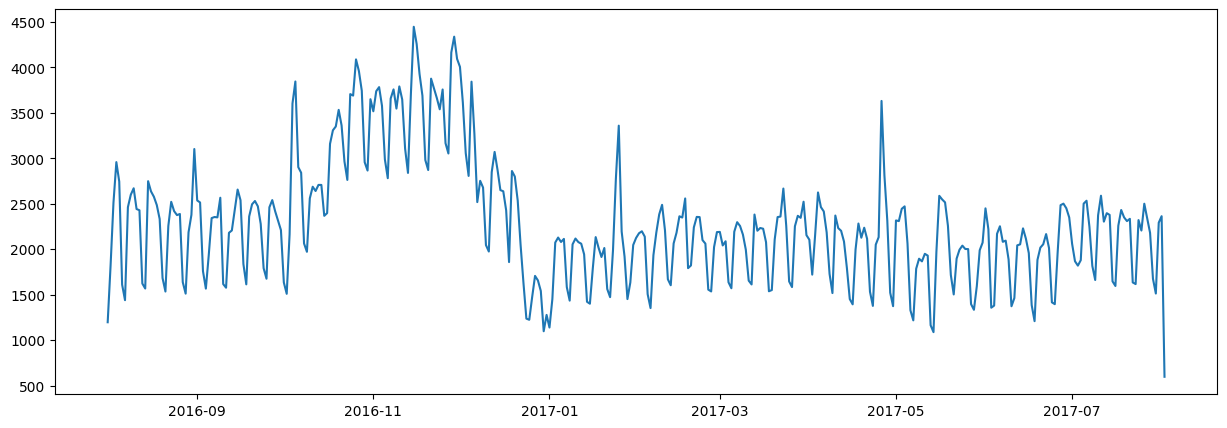

In [263]:
#dau 그래프
plt.figure(figsize=(15, 5))
plt.plot(dau)
plt.show()

In [326]:
#wau 구하기
start_date = pd.Timestamp('2016-08-01')
end_date = pd.Timestamp('2017-07-31')
filtered_data = df[(df['new_visitStartTime'] >= start_date) & (df['new_visitStartTime'] <= end_date)]

# 월별로 사용자를 그룹화하고 MAU 계산
wau = filtered_data.resample('W-Mon', on='new_visitStartTime')['fullVisitorId'].nunique()
wau

new_visitStartTime
2016-08-01     1197
2016-08-08    14888
2016-08-15    15539
2016-08-22    14599
2016-08-29    14398
2016-09-05    15303
2016-09-12    14482
2016-09-19    14938
2016-09-26    15135
2016-10-03    14308
2016-10-10    19028
2016-10-17    18156
2016-10-24    22202
2016-10-31    24384
2016-11-07    23405
2016-11-14    23761
2016-11-21    25427
2016-11-28    24449
2016-12-05    24697
2016-12-12    16993
2016-12-19    17463
2016-12-26    12348
2017-01-02     9250
2017-01-09    12824
2017-01-16    12357
2017-01-23    12262
2017-01-30    14879
2017-02-06    12785
2017-02-13    14045
2017-02-20    14582
2017-02-27    13531
2017-03-06    13180
2017-03-13    13793
2017-03-20    13199
2017-03-27    14321
2017-04-03    14625
2017-04-10    14485
2017-04-17    12666
2017-04-24    13155
2017-05-01    15294
2017-05-08    13109
2017-05-15    11185
2017-05-22    14326
2017-05-29    11801
2017-06-05    13072
2017-06-12    12674
2017-06-19    12237
2017-06-26    12643
2017-07-03    15028
2

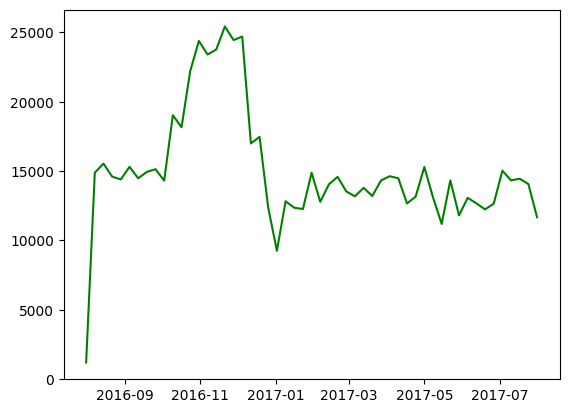

In [327]:
plt.plot(wau, color = 'green')

In [328]:
#mau 구하기
start_date = pd.Timestamp('2016-08-01')
end_date = pd.Timestamp('2017-07-31')
filtered_data = df[(df['new_visitStartTime'] >= start_date) & (df['new_visitStartTime'] <= end_date)]

# 월별로 사용자를 그룹화하고 MAU 계산
mau = filtered_data.resample('M', on='new_visitStartTime')['fullVisitorId'].nunique()
mau

new_visitStartTime
2016-08-31     63316
2016-09-30     61491
2016-10-31     86516
2016-11-30    101836
2016-12-31     67274
2017-01-31     54720
2017-02-28     53209
2017-03-31     58755
2017-04-30     56859
2017-05-31     54245
2017-06-30     54094
2017-07-31     57813
Freq: M, Name: fullVisitorId, dtype: int64

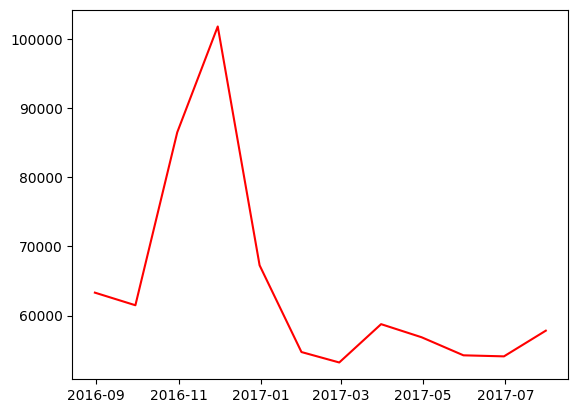

In [329]:
plt.plot(mau, color = 'red')

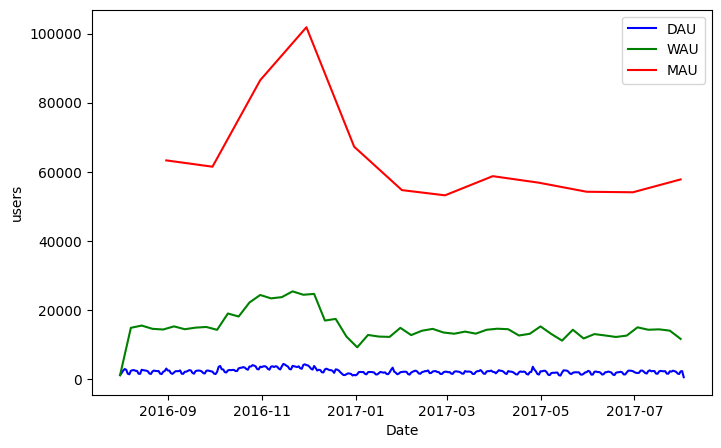

In [330]:
#dau, mau 그래프 합치기
plt.figure(figsize=(8,5))
plt.plot(dau, label = 'DAU', color = 'blue')
plt.plot(wau, label = 'WAU', color = 'green')
plt.plot(mau, label = 'MAU', color = 'red')
plt.xlabel('Date')
plt.ylabel('users')
plt.legend()
plt.show()

### EDA 차트 그려보기(연습)

<Axes: xlabel='deviceCategory', ylabel='transactionRevenue'>

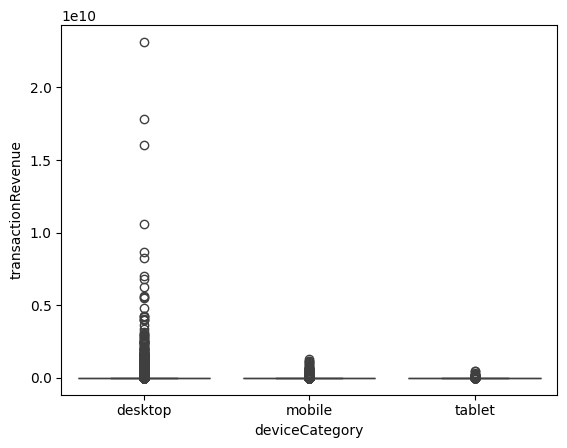

In [158]:
sns.boxplot(data = df3, x = 'deviceCategory', y = 'transactionRevenue')

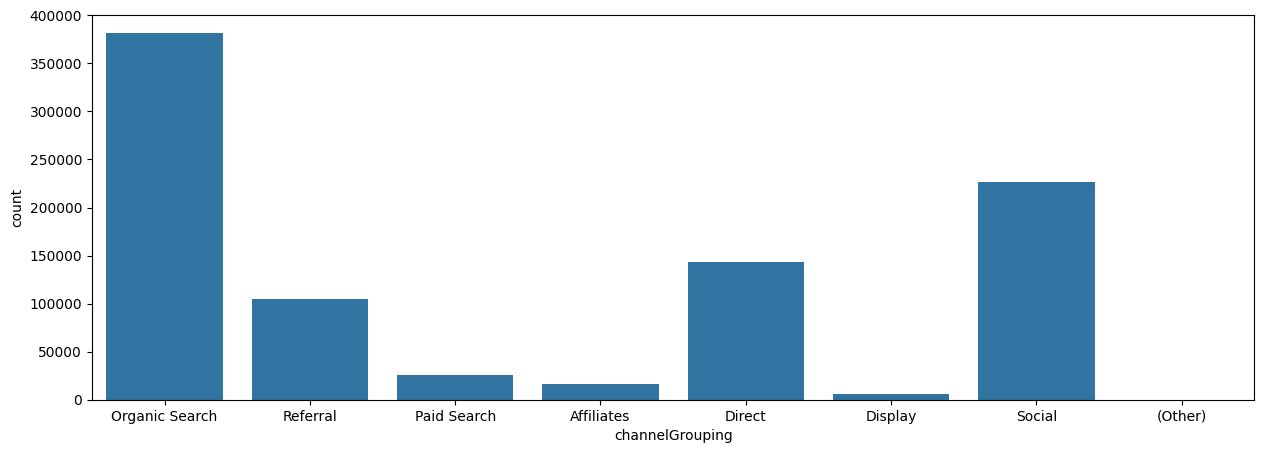

In [114]:
#channelgrouping 
plt.figure(figsize = (15, 5))
sns.countplot(data = df3, x = 'channelGrouping')
plt.show()
#organic Search 유입이 가장 많으며 다음은 social을 통한 유입이 많다. --> social 마케팅 강화 방법